In [13]:
import os

import numpy as np
import pandas as pd
from skimage import io

import PIL
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
Dataset = '../../../../Eurosat_Dataset'
labels = os.listdir(Dataset)
print(labels, len(labels))

['Pasture', 'AnnualCrop', 'PermanentCrop', 'Highway', 'Residential', 'Industrial', 'SeaLake', 'HerbaceousVegetation', 'River', 'Forest'] 10


Text(0.5, 1.0, 'EUROSAT Class Distribution')

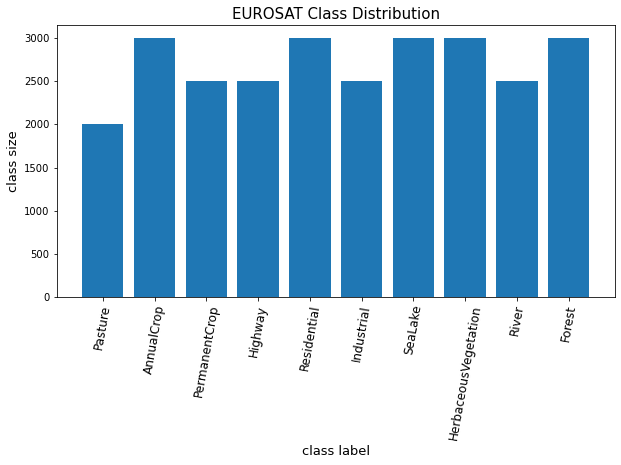

In [7]:
# Histogram of the data
counts = {}
for i in labels:
    counts[i] = len(os.listdir(os.path.join(Dataset, i)))
    
plt.figure(figsize = (10,5))
    
plt.bar(range(len(counts)), list(counts.values()), align = 'center')
plt.xticks(range(len(counts)), list(counts.keys()),
           fontsize = 12, rotation = 80)
plt.xlabel('class label', fontsize = 13)
plt.ylabel('class size', fontsize = 13)
plt.title('EUROSAT Class Distribution', fontsize = 15)
    
    

In [12]:
img_paths = [os.path.join(Dataset, l, l + '_1000.jpg') for l in labels]
img_paths = img_paths + [os.path.join(Dataset, l, l + '_2000.jpg') for l in labels]

def plot_sat_imgs(paths):
    plt.figure(figsize = (15, 8))
    for i in range(20):
        plt.subplot(4, 5, i+1, xticks = [], yticks = [])
        img = PIL.Image.open(paths[i], 'r')
        plt.imshow(np.asarray(img))
        plt.title(paths[i].split('/')[-2])
    
# plot_sat_imgs(img_paths)


In [11]:
(img_paths)

['../../../../Eurosat_Dataset/Pasture/Pasture_1000.jpg',
 '../../../../Eurosat_Dataset/AnnualCrop/AnnualCrop_1000.jpg',
 '../../../../Eurosat_Dataset/PermanentCrop/PermanentCrop_1000.jpg',
 '../../../../Eurosat_Dataset/Highway/Highway_1000.jpg',
 '../../../../Eurosat_Dataset/Residential/Residential_1000.jpg',
 '../../../../Eurosat_Dataset/Industrial/Industrial_1000.jpg',
 '../../../../Eurosat_Dataset/SeaLake/SeaLake_1000.jpg',
 '../../../../Eurosat_Dataset/HerbaceousVegetation/HerbaceousVegetation_1000.jpg',
 '../../../../Eurosat_Dataset/River/River_1000.jpg',
 '../../../../Eurosat_Dataset/Forest/Forest_1000.jpg',
 '../../../../Eurosat_Dataset/Pasture/Pasture_2000.jpg',
 '../../../../Eurosat_Dataset/AnnualCrop/AnnualCrop_2000.jpg',
 '../../../../Eurosat_Dataset/PermanentCrop/PermanentCrop_2000.jpg',
 '../../../../Eurosat_Dataset/Highway/Highway_2000.jpg',
 '../../../../Eurosat_Dataset/Residential/Residential_2000.jpg',
 '../../../../Eurosat_Dataset/Industrial/Industrial_2000.jpg',
 '..

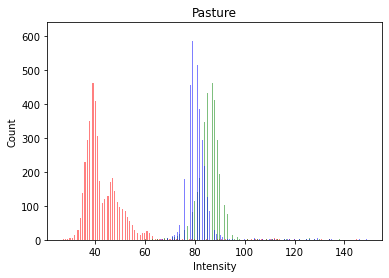

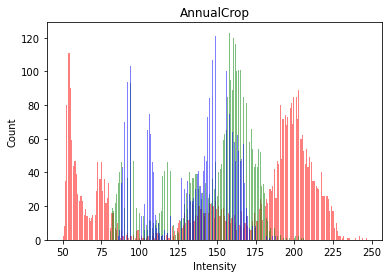

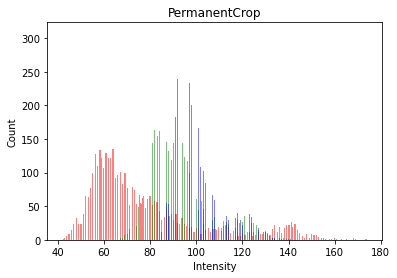

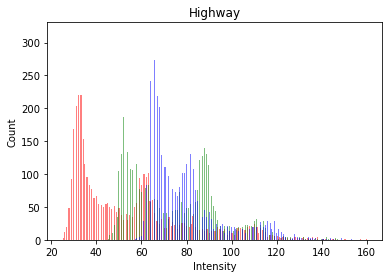

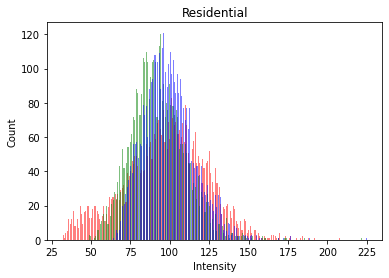

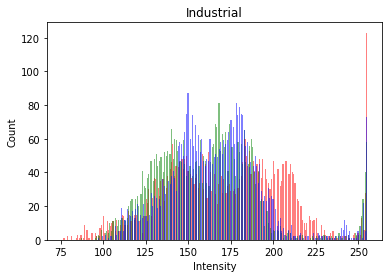

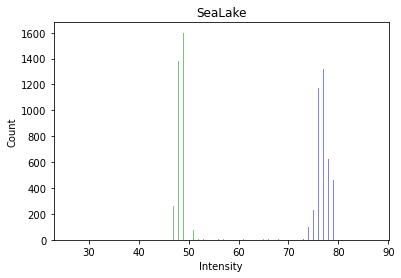

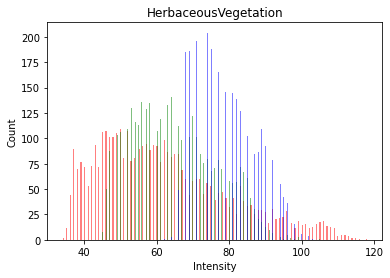

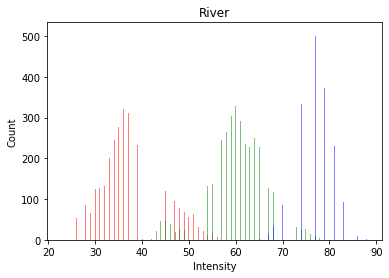

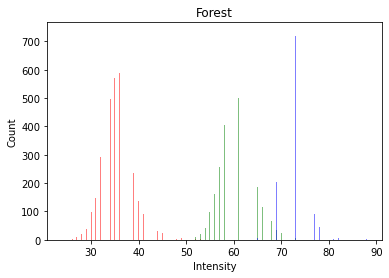

In [11]:
def plot_img_histogram(img_path):
    
    image = io.imread(img_path)
    plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    plt.xlabel('Intensity')
    plt.ylabel('Count')
    plt.title(img_path.split('/')[-2])
    plt.show()

for l in labels:
   path = os.path.join(Dataset, l, l+'_1000.jpg')
   plot_img_histogram(path)

In [20]:
import re
from sklearn.model_selection import StratifiedShuffleSplit
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAIN_DIR = '../../working/training'
TEST_DIR = '../../working/testing'
BATCH_SIZE = 128
NUM_CLASSES=len(labels)
INPUT_SHAPE = (64, 64, 3)
CLASS_MODE = 'categorical'

# create training and testing directories
for path in (TRAIN_DIR, TEST_DIR):
    if not os.path.exists(path):
        os.mkdir(path)
        
# create class label subdirectories in train and test
for l in labels:
    
    if not os.path.exists(os.path.join(TRAIN_DIR, l)):
        os.mkdir(os.path.join(TRAIN_DIR, l))

    if not os.path.exists(os.path.join(TEST_DIR, l)):
        os.mkdir(os.path.join(TEST_DIR, l))

In [25]:
# map each image path to their class label in 'data'
data = {}

# This is kind of a hot encoding
for l in labels:
    for img in os.listdir(Dataset+'/'+l):
        data.update({os.path.join(Dataset, l, img): l})
        
X = pd.Series(list(data.keys()))
y = pd.get_dummies(pd.Series(data.values()))

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=69)

# split the list of image paths
for train_idx, test_idx in split.split(X, y):
    
    train_paths = X[train_idx]
    test_paths = X[test_idx]

    # define a new path for each image depending on training or testing
    new_train_paths = [re.sub('\.\.\/input\/EUROSAT', '../working/training', i) for i in train_paths]
    new_test_paths = [re.sub('\.\.\/input\/EUROSAT', '../working/testing', i) for i in test_paths]

    train_path_map = list((zip(train_paths, new_train_paths)))
    test_path_map = list((zip(test_paths, new_test_paths)))
    
    # move the files
    print("moving training files..")
    for i in tqdm(train_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training', 'testing', i[1])):
                shutil.copy(i[0], i[1])
    
    print("moving testing files..")
    for i in tqdm(test_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training', 'testing', i[1])):
                shutil.copy(i[0], i[1])

In [28]:
X

0        ../../Eurosat_Dataset/Pasture/Pasture_1963.jpg
1         ../../Eurosat_Dataset/Pasture/Pasture_618.jpg
2        ../../Eurosat_Dataset/Pasture/Pasture_1676.jpg
3         ../../Eurosat_Dataset/Pasture/Pasture_526.jpg
4        ../../Eurosat_Dataset/Pasture/Pasture_1166.jpg
                              ...                      
26996       ../../Eurosat_Dataset/Forest/Forest_802.jpg
26997      ../../Eurosat_Dataset/Forest/Forest_2808.jpg
26998       ../../Eurosat_Dataset/Forest/Forest_942.jpg
26999      ../../Eurosat_Dataset/Forest/Forest_1873.jpg
27000      ../../Eurosat_Dataset/Forest/Forest_1663.jpg
Length: 27001, dtype: object